2024-03-13 11:52:40,538 - GillesPy2 - WARNING - Unable to use C++ optimized solvers due to one or more missing dependencies: ['g++']. The performance of this package can be significantly increased if you install/configure these on your machine.


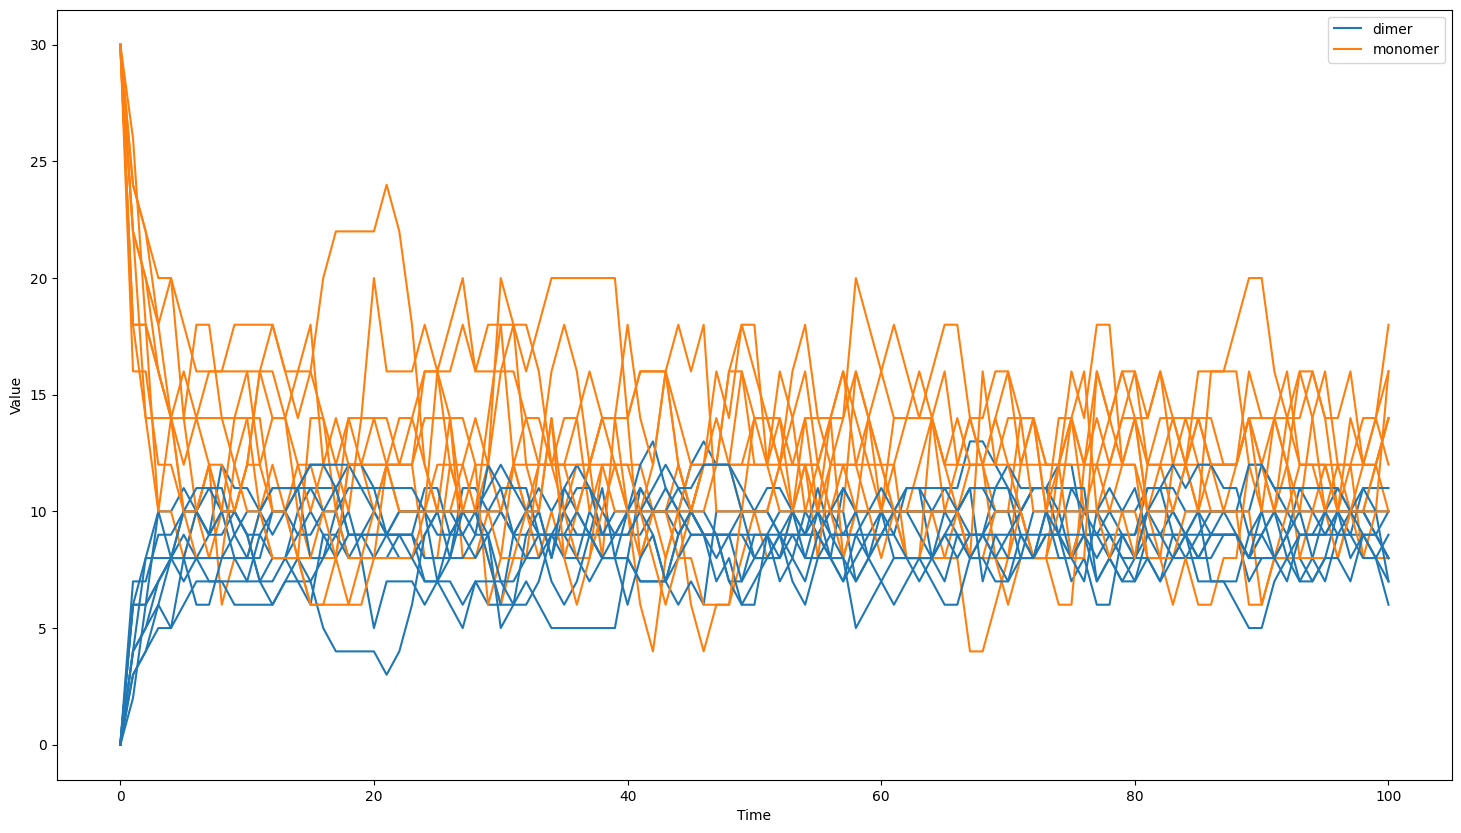

In [1]:
import gillespy2
def create_dimerization(parameter_values=None):
    # First call the gillespy2.Model initializer.
    model = gillespy2.Model(name='Dimerization')

    # Define parameters for the rates of creation and dissociation.
    k_c = gillespy2.Parameter(name='k_c', expression=0.005)
    k_d = gillespy2.Parameter(name='k_d', expression=0.08)
    model.add_parameter([k_c, k_d])

    # Define variables for the molecular species representing M and D.
    m = gillespy2.Species(name='monomer', initial_value=30)
    d = gillespy2.Species(name='dimer',   initial_value=0)
    model.add_species([m, d])

    # The list of reactants and products for a Reaction object are each a
    # Python dictionary in which the dictionary keys are Species objects
    # and the values are stoichiometries of the species in the reaction.
    r_c = gillespy2.Reaction(name="r_creation", rate=k_c, reactants={m:2}, products={d:1})
    r_d = gillespy2.Reaction(name="r_dissociation", rate=k_d, reactants={d:1}, products={m:2})
    model.add_reaction([r_c, r_d])

    # Set the timespan for the simulation.
    tspan = gillespy2.TimeSpan.linspace(t=100, num_points=101)
    model.timespan(tspan)
    return model

model = create_dimerization()
results = model.run(number_of_trajectories=10)
results.plot()